In [14]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
preprocessed_path = "../data/processed/climate_nasa_preprocessed.csv"
df = pd.read_csv(preprocessed_path)


df.head()


,date,likesCount,profileName,commentsCount,text,text_length,clean_text,tokens,lemmas
0,2022-09-07 17:12:32+00:00,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,0.0,Neat comparison I have not heard it before.\n ...,173,neat comparison i have not heard it before i w...,"['neat', 'comparison', 'heard', 'would', 'say'...","['neat', 'comparison', 'heard', 'would', 'say'..."
1,2022-09-08 14:51:13+00:00,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,0.0,An excellent way to visualise the invisible! T...,51,an excellent way to visualise the invisible th...,"['excellent', 'way', 'visualise', 'invisible',...","['excellent', 'way', 'visualise', 'invisible',..."
2,2022-09-07 17:19:41+00:00,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...,108,does the co2ghg in the troposphere affect the ...,"['co2ghg', 'troposphere', 'affect', 'stratosph...","['co2ghg', 'troposphere', 'affect', 'stratosph..."
3,2022-09-08 00:51:30+00:00,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,0.0,excellent post! I defo feel the difference - o...,94,excellent post i defo feel the difference one ...,"['excellent', 'post', 'defo', 'feel', 'differe...","['excellent', 'post', 'defo', 'feel', 'differe..."
4,2022-09-07 19:06:20+00:00,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart...",128,yes and carbon dioxide does not harm the earth...,"['yes', 'carbon', 'dioxide', 'harm', 'earth', ...","['yes', 'carbon', 'dioxide', 'harm', 'earth', ..."


In [16]:
from textblob import TextBlob

def get_sentiment(text):
    if not isinstance(text, str):
        text = ""
        
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "positive"
    elif polarity < -0.1:
        return "negative"
    else:
        return "neutral"


df['sentiment'] = df['clean_text'].apply(get_sentiment)
df['sentiment'].value_counts()



sentiment
neutral     289
positive    150
negative     65
Name: count, dtype: int64

In [17]:
X = df['clean_text']   
y = df['sentiment']    

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (403,)
Test shape: (101,)


In [18]:

X_train = X_train.fillna("")
X_test = X_test.fillna("")


tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

print("TF-IDF vectorized shape:", X_train_vec.shape)



TF-IDF vectorized shape: (403, 5000)


In [19]:

df_model = df[df['clean_text'].notna() & (df['clean_text'] != "")]
X = df_model['clean_text']
y = df_model['sentiment']



In [20]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(max_iter=500)
clf.fit(X_train_vec, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [21]:
y_pred = clf.predict(X_test_vec)


Accuracy: 0.6040
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        13
     neutral       0.61      0.95      0.74        58
    positive       0.55      0.20      0.29        30

    accuracy                           0.60       101
   macro avg       0.39      0.38      0.35       101
weighted avg       0.51      0.60      0.51       101



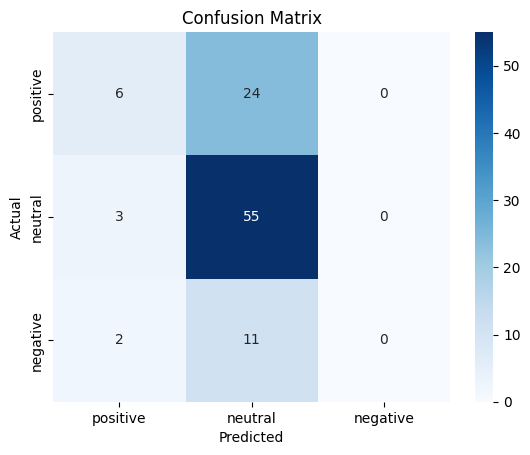

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")


print(classification_report(y_test, y_pred, zero_division=0))


cm = confusion_matrix(y_test, y_pred, labels=["positive","neutral","negative"])
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["positive","neutral","negative"],
            yticklabels=["positive","neutral","negative"], cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
import joblib
import os


os.makedirs("../src/models", exist_ok=True)

joblib.dump(clf, "../src/models/sentiment_clf.pkl")
joblib.dump(tfidf, "../src/models/tfidf_vectorizer.pkl")
print("Model and vectorizer saved!")


Model and vectorizer saved!
